In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:

df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [7]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [8]:
#Published Airline IATA Code null fields removed
df_bool = pd.notnull(df["Published Airline IATA Code"])
df=df[df_bool]

In [9]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [10]:
df["Boarding Area"]=df["Boarding Area"].map({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6})

In [11]:
df["Terminal"]=df["Terminal"].map({"Terminal 1":0,"International":1})

In [12]:
df["Price Category Code"]=df["Price Category Code"].map({"Low Fare":0,"Other":1})

In [13]:
df["Boarding Area"]=df["Boarding Area"].fillna(df["Boarding Area"].mean())

In [14]:
df["Terminal"]=df["Terminal"].fillna(df["Terminal"].mean())

In [15]:
df["Boarding Area"]=df["Boarding Area"].astype("int64")

In [16]:
df["Terminal"]=df["Terminal"].astype("int64")

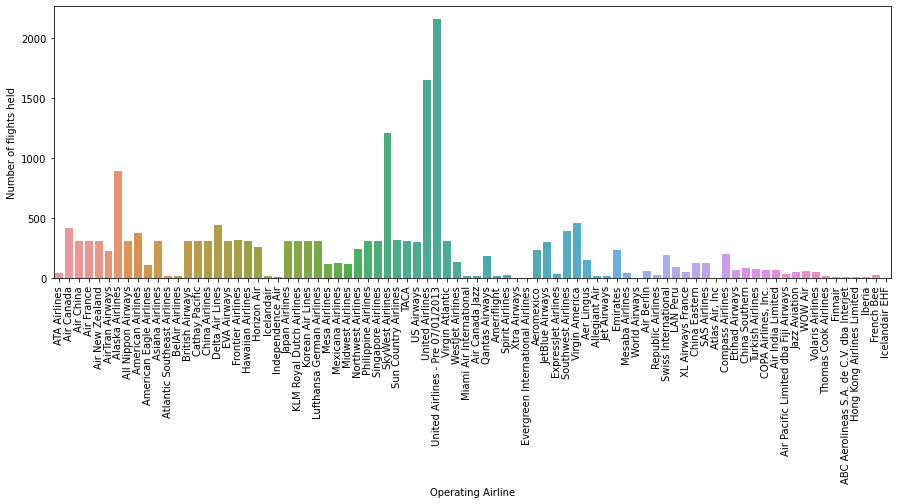

In [17]:
plt.figure(figsize=(15,5))
sns.countplot("Operating Airline",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of flights held");

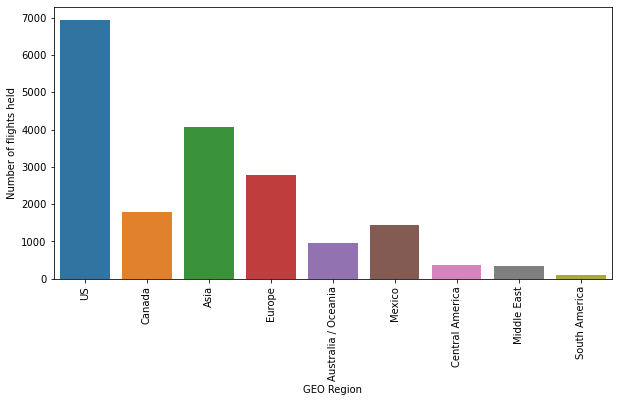

In [18]:
plt.figure(figsize=(10,5))
sns.countplot("GEO Region",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of flights held");

In [19]:
airline_count = df["Operating Airline"].value_counts()

In [20]:

airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [21]:
list_group=pd.DataFrame(airline_passenger_count)
list_group.head(10)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


In [22]:
airline_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: Operating Airline, Length: 84, dtype: int64

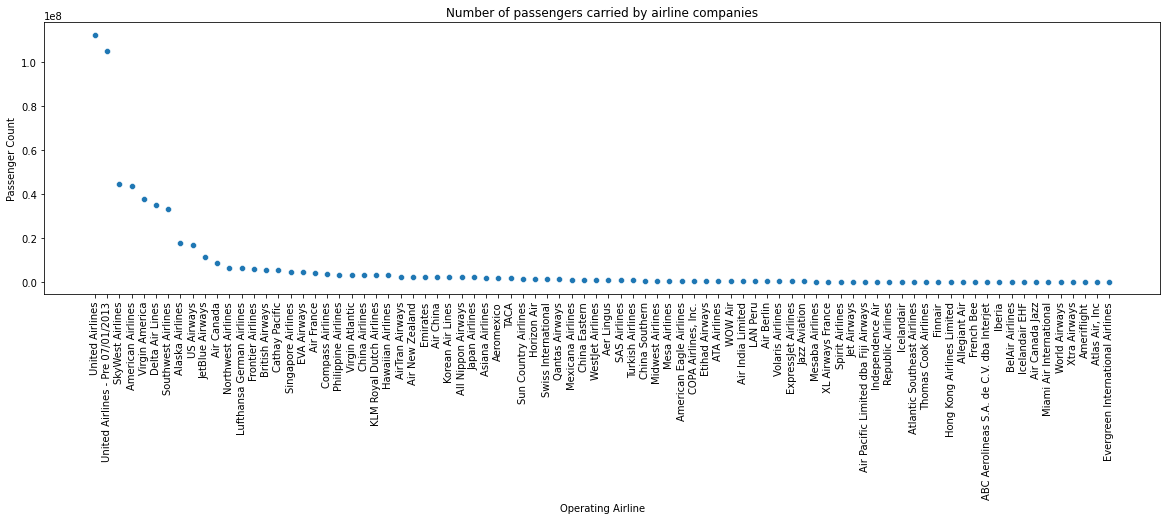

In [23]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Number of passengers carried by airline companies");

In [24]:
airline_passenger_count_of_year=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False)

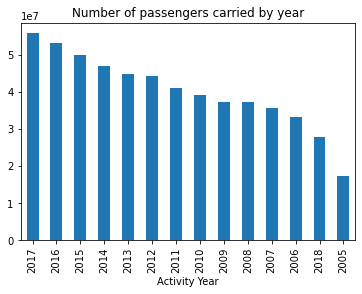

In [25]:

airline_passenger_count_of_year.plot.bar()
plt.title("Number of passengers carried by year");

In [26]:
x=pd.get_dummies(df,drop_first=True)

In [27]:
x.isnull().sum()

Price Category Code                  0
Terminal                             0
Boarding Area                        0
Passenger Count                      0
Activity Month                       0
                                    ..
GEO Region_Middle East               0
GEO Region_South America             0
GEO Region_US                        0
Activity Type Code_Enplaned          0
Activity Type Code_Thru / Transit    0
Length: 326, dtype: int64

In [28]:
allscore=[]
allclusters=[]
distances=[]
def clust(kactane):
    for i in range(2,kactane+1):
        model = KMeans(n_clusters=i)
        model =  model.fit(x)
        tahmin = model.predict(x)
        score = silhouette_score(x,tahmin)
        distance = model.inertia_
        print("Cluster" ,i,"score : ",score)
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)

In [31]:
clust(10)

Cluster 2 score :  0.8593932211292966
Cluster 3 score :  0.8283824480340515
Cluster 4 score :  0.7862464211067806
Cluster 5 score :  0.7844843432044105
Cluster 6 score :  0.6616368369478884
Cluster 7 score :  0.6621053742753515
Cluster 8 score :  0.6464989519801997
Cluster 9 score :  0.6404310376150301
Cluster 10 score :  0.614991622994754


In [32]:
import matplotlib.pyplot as plt

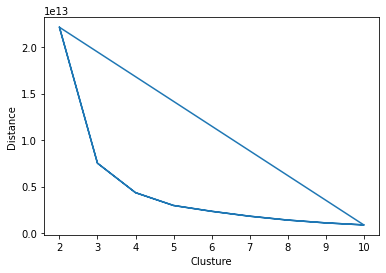

In [33]:
plt.xlabel("Clusture")
plt.ylabel("Distance")
plt.plot(allclusters,distances)

In [45]:
model=KMeans(n_clusters=4)

In [46]:
model=model.fit(x)

In [47]:
tahmin=model.predict(x)

In [48]:
x["cluster"]=tahmin

In [49]:
x.head()

,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,...,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,cluster
0,0,0,1,27271,7,2005,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,29131,7,2005,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5415,7,2005,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,1,35156,7,2005,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
4,1,0,1,34090,7,2005,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [50]:
silhouette_score(x,tahmin)

0.7862464217541929

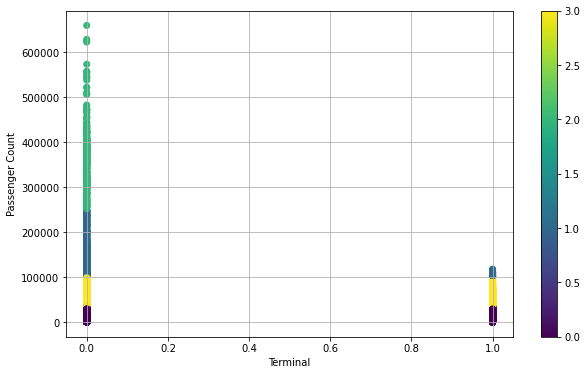

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x["Terminal"],x["Passenger Count"],c=tahmin)
plt.xlabel("Terminal")
plt.ylabel("Passenger Count")
plt.colorbar()
plt.grid()